# PROJECT PROPOSAL GROUP 26

## Impact of Cholesterol Levels and Age on Heart Disease

### Introduction

Heart disease is one of the leading causes of death around the globe. Several factors can increase the likelihoodnof developing heart disease, such as age, high blood pressure, high cholesterol levels, obesity, diabetes, and family histrory.

In this project, we're aiming to investigate the impact of age and cholesterol levels on the chances of developing heart disease. Age and cholesterol levels are two of the most commonly used indicators to assess the risk of developing heart disease. However, the relationship between these variables and the likelihood of developing heart disease is not fully understood. Therefore, the main question we will try to answer with our project is:
       "Does age and cholesterol levels affect the likelihood of developing heart disease?"
       
The dataset we're using is collected by the University of California, Irvine, contains data on 303 individuals. Demographic and clinical measurements such as age, sex, chest pain type, resting blood pressure, serum cholesteral in mg/dl etc.

### Data Analysis

In [18]:
#Load this before continuing
library(tidyverse)
library(repr)
library(tidymodels)


In [19]:
#Reading data into R

url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
cleveland_heart <- read_csv(url)
colnames(cleveland_heart) <- c("age", "sex", "chest_pain", "resting_blood_pressure", "cholesterol_level", "fasting_blood_sugar", "resting_electrocardiographic_results", "maximum_heart_rate_achieved", "exercise_induced_angina", "oldpeak", "slope", "major_vessels_colored", "thal", "diagnosis")
head(cleveland_heart)


New names:
• `1.0` -> `1.0...2`
• `1.0` -> `1.0...3`
• `1.0` -> `1.0...6`
• `0.0` -> `0.0...9`
• `0.0` -> `0.0...12`
Rows: 302 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): 0.0...12, 6.0
dbl (12): 63.0, 1.0...2, 1.0...3, 145.0, 233.0, 1.0...6, 2.0, 150.0, 0.0...9...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,chest_pain,resting_blood_pressure,cholesterol_level,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,major_vessels_colored,thal,diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3


In [20]:
#Selecting our relevant variables into a tidy format

heart_clean <- cleveland_heart |>
select(age, cholesterol_level, diagnosis)
head(heart_clean)


age,cholesterol_level,diagnosis
<dbl>,<dbl>,<dbl>
67,286,2
67,229,1
37,250,0
41,204,0
56,236,0
62,268,3


In [21]:
#Change diagnosis to 0 for not heart diagnosis and 1 for any heart diagnosis
heart_diagnosis <- heart_clean |>
mutate(Diagnosis = diagnosis != 0) |>
mutate("Diagnosis" = as_factor(Diagnosis))
head(heart_diagnosis)


age,cholesterol_level,diagnosis,Diagnosis
<dbl>,<dbl>,<dbl>,<fct>
67,286,2,TRUE
67,229,1,TRUE
37,250,0,FALSE
41,204,0,FALSE
56,236,0,FALSE
62,268,3,TRUE


In [22]:
#Now choose the required variables
heart_data <- heart_diagnosis |>
select(-diagnosis)
head(heart_data)


age,cholesterol_level,Diagnosis
<dbl>,<dbl>,<fct>
67,286,TRUE
67,229,TRUE
37,250,FALSE
41,204,FALSE
56,236,FALSE
62,268,TRUE


In [24]:
#Split data into training and testing

heart_data_split <- initial_split(heart_data, prop = 0.75, strata = Diagnosis)
heart_data_train <- training(heart_data_split)
heart_data_test <- testing(heart_data_split)


In [25]:
#Creating data summary table of training data

heart_table <- heart_data_train |>
group_by(Diagnosis) |>
summarize(num_obs = n(),
mean_age = mean(age, na.rm = TRUE),
mean_cholesterol = mean(cholesterol_level, na.rm = TRUE),
num_missing = sum((is.na(age)) + sum(is.na(cholesterol_level))))

heart_table


Diagnosis,num_obs,mean_age,mean_cholesterol,num_missing
<fct>,<int>,<dbl>,<dbl>,<int>
FALSE,122,52.46721,242.8607,0
TRUE,104,56.38462,254.8077,0


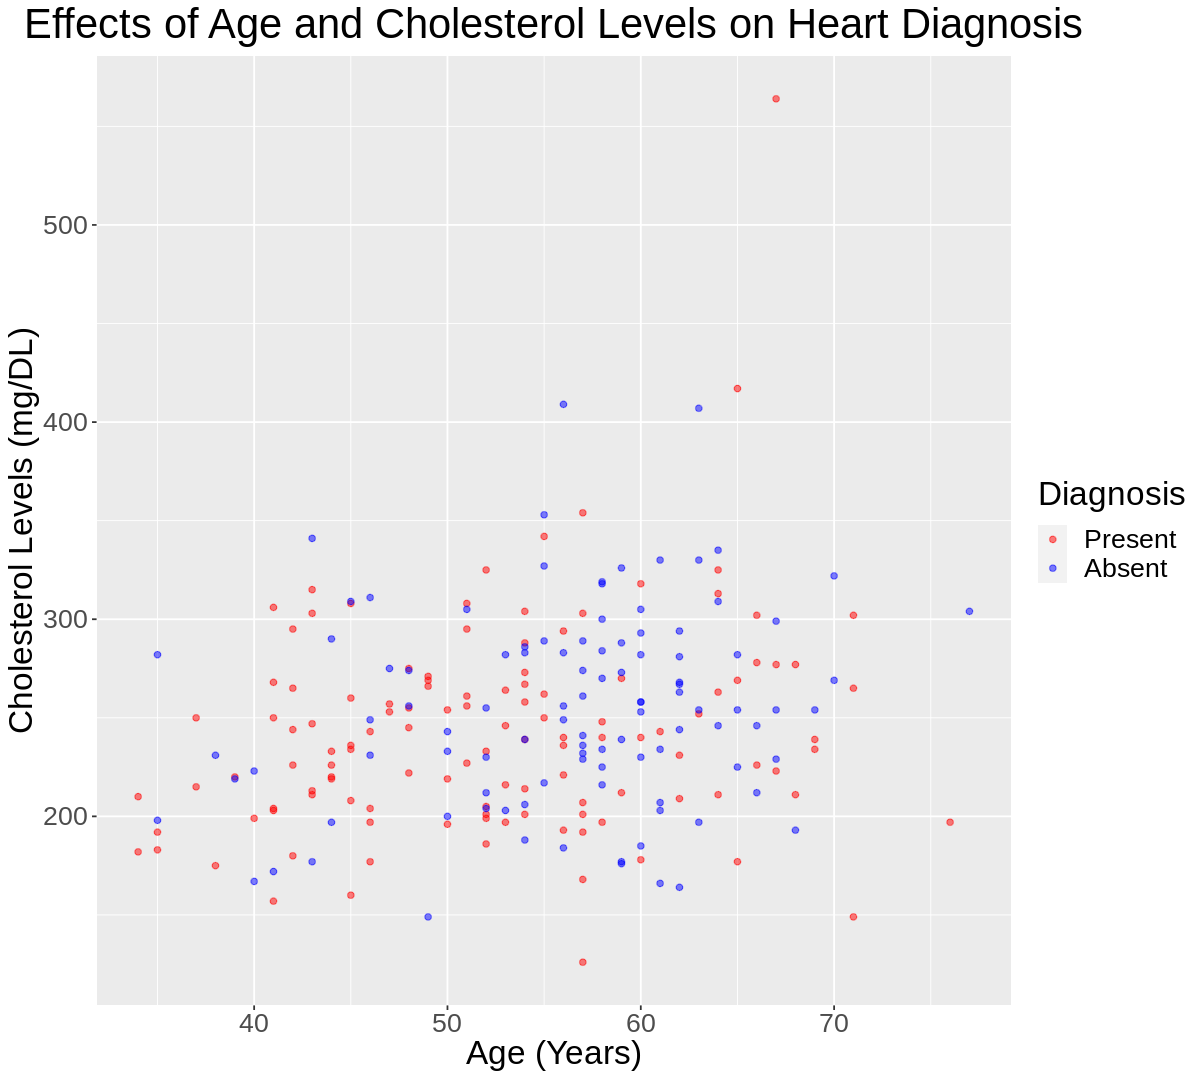

In [26]:
#Creating a plot to visualize effects of age and cholesterol levels

options(repr.plot.width = 10, repr.plot.height = 9)

heart_data_plot <- heart_data_train |>
ggplot(aes(x = age, y = cholesterol_level, color = Diagnosis)) +
geom_point(alpha = 0.5) +
labs(title = "Effects of Age and Cholesterol Levels on Heart Diagnosis", x = "Age (Years)", y = "Cholesterol Levels (mg/DL)", color = "Diagnosis") +
scale_color_manual(labels = c("Present", "Absent"), values = c("red", "blue")) +
theme(plot.title = element_text(hjust = 0.5, size = 25),
axis.title.x = element_text(size = 20),
axis.title.y = element_text(size = 20),
text = element_text(size = 20))

heart_data_plot

### Expected Outcomes and Significance

Expected findings:
We expect to find positive relationships between age and heart disease, as well as cholesterol and heart disease. With increasing age and increasing cholesterol, we expect increased likelihood of heart disease. 

Impact:
Our findings can help understand some contributing factors of heart disease. For example, understanding the impact of cholesterol on risk of heart disease can help prevent it by modifying diet and health, etc. 

Future Questions:
If cholesterol impacts the risk of heart disease, how can we work on controlling its levels (i.e. diet, exercise)? If age impacts the risk of heart disease, what are some other ways to lower risk in the elderly population?
